<a href="https://colab.research.google.com/github/HAREMUTECH/Qaudratic/blob/master/Damilola_CNN_Project_CANCER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import os
import zipfile

from glob import glob
from PIL import Image as pil_image
from matplotlib.pyplot import imshow, imsave
from IPython.display import Image as Image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import sys
import cv2
from sklearn.naive_bayes import GaussianNB

In [2]:
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

import kaggle
print("Imported kaggle API successfully !")

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
Imported kaggle API successfully !


In [3]:
print("Downloading dataset : ")
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign
print("Downloaded Successfully!")

 98% 318M/325M [00:02<00:00, 150MB/s]
100% 325M/325M [00:02<00:00, 119MB/s]
Downloaded Successfully!


In [4]:
ls -a

 ./                                 'kaggle (1).json'
 ../                                 kaggle.json
 1-s2.0-S2352914819302047-main.pdf   sample_data/
 .config/                            skin-cancer-malignant-vs-benign.zip


In [5]:
zip_ref = zipfile.ZipFile('skin-cancer-malignant-vs-benign.zip', 'r')
zip_ref.extractall()
zip_ref.close()
os.unlink('skin-cancer-malignant-vs-benign.zip')

In [6]:
folder_benign_train = './train/benign'
folder_malignant_train = './train/malignant'

folder_benign_test = './test/benign'
folder_malignant_test = './test/malignant'

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

# Create labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])


# Merge data 
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

# Shuffle data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

[[[189 121 134]
  [188 126 141]
  [190 135 158]
  ...
  [117  64  58]
  [119  64  61]
  [124  72  74]]

 [[187 121 135]
  [184 122 133]
  [187 129 151]
  ...
  [119  66  62]
  [119  66  62]
  [120  68  70]]

 [[184 116 131]
  [187 121 131]
  [185 123 138]
  ...
  [121  65  64]
  [118  62  61]
  [119  64  67]]

 ...

 [[152 103  86]
  [149  98  79]
  [141  93  71]
  ...
  [189 153 181]
  [189 155 179]
  [187 152 174]]

 [[149 103  88]
  [143  94  79]
  [143  95  72]
  ...
  [191 152 179]
  [189 156 177]
  [188 153 175]]

 [[153 113 105]
  [138  91  73]
  [138  87  66]
  ...
  [190 156 181]
  [191 156 180]
  [189 154 176]]]


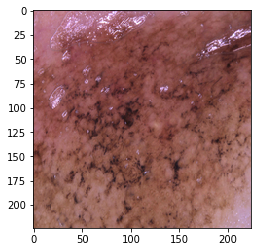

In [7]:
print(X_test[1])
plt.imshow(X_test[1], interpolation='nearest')
plt.show()

In [8]:
X_train = X_train/255
X_test = X_test/255
print(X_test[1])

[[[0.74117647 0.4745098  0.5254902 ]
  [0.7372549  0.49411765 0.55294118]
  [0.74509804 0.52941176 0.61960784]
  ...
  [0.45882353 0.25098039 0.22745098]
  [0.46666667 0.25098039 0.23921569]
  [0.48627451 0.28235294 0.29019608]]

 [[0.73333333 0.4745098  0.52941176]
  [0.72156863 0.47843137 0.52156863]
  [0.73333333 0.50588235 0.59215686]
  ...
  [0.46666667 0.25882353 0.24313725]
  [0.46666667 0.25882353 0.24313725]
  [0.47058824 0.26666667 0.2745098 ]]

 [[0.72156863 0.45490196 0.51372549]
  [0.73333333 0.4745098  0.51372549]
  [0.7254902  0.48235294 0.54117647]
  ...
  [0.4745098  0.25490196 0.25098039]
  [0.4627451  0.24313725 0.23921569]
  [0.46666667 0.25098039 0.2627451 ]]

 ...

 [[0.59607843 0.40392157 0.3372549 ]
  [0.58431373 0.38431373 0.30980392]
  [0.55294118 0.36470588 0.27843137]
  ...
  [0.74117647 0.6        0.70980392]
  [0.74117647 0.60784314 0.70196078]
  [0.73333333 0.59607843 0.68235294]]

 [[0.58431373 0.40392157 0.34509804]
  [0.56078431 0.36862745 0.30980392]


In [9]:
model = SVC()
model.fit(X_train.reshape(X_train.shape[0],-1), y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
y_pred = model.predict(X_test.reshape(X_test.shape[0],-1))

In [11]:
print(accuracy_score(y_test, y_pred))

0.8348484848484848


In [12]:
logreg = LogisticRegression(C= 1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train.reshape(X_train.shape[0],-1), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
y_pred = logreg.predict(X_test.reshape(X_test.shape[0],-1))

In [14]:
print(accuracy_score(y_test, y_pred))

0.7863636363636364


In [15]:
#Apply gaussian naive bayes to fit train set and predic test set 
model = GaussianNB()

model.fit(X_train.reshape(X_train.shape[0],-1), y_train)
prediction = model.predict(X_test.reshape(X_test.shape[0],-1))

#Display classification result
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))
print("f1-score:",metrics.f1_score(y_test, prediction))

Accuracy: 0.7015151515151515
Precision: 0.6745762711864407
Recall: 0.6633333333333333
f1-score: 0.66890756302521


In [ ]:
#Fit SVM to train set and use it to predict the test set 
svm_clf = svm.SVC(kernel='linear') 
svm_clf.fit(X_train.shape[0],-1), y_train)
prediction = svm_clf.predict(X_test.reshape(X_test.shape[0],-1))
#Display classification result 
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))
print("f1-score:",metrics.f1_score(y_test, prediction))

In [ ]:
#Determine classification result and display
validation_score = cross_val_score(svm_clf, x_fe_train , y_train, cv = 10, scoring = 'accuracy').mean()
print('SVM on Feature Engineered Images: ', validation_score)
hide_toggle()

In [ ]:
#Display confusion matrix
cf_matrix = metrics.confusion_matrix(y_test, prediction)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
#Apply gaussian naive bayes to fit train set and predic test set 
model = GaussianNB()

model.fit(x_fe_train,y_fe_train)
prediction = model.predict(x_fe_test)

#Display classification result
print("Accuracy:",metrics.accuracy_score(y_fe_test, prediction))
print("Precision:",metrics.precision_score(y_fe_test, prediction))
print("Recall:",metrics.recall_score(y_fe_test, prediction))
print("f1-score:",metrics.f1_score(y_fe_test, prediction))
hide_toggle()

In [ ]:
#Determine validation score and displaying it 
validation_score = cross_val_score(model, x_train , y_train, cv = 10, scoring = 'accuracy').mean()
print('Gaussian Naive Bayes Validation score', validation_score)
hide_toggle()

In [ ]:
#Display confusion matrix 
cf_matrix = metrics.confusion_matrix(y_test, prediction)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')